In [1]:
# import packages and set ile path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
# from haversine import haversine
from sklearn.model_selection import GridSearchCV
fp = "C:/Users/gnm/Documents/Brainstation Capstone 2/data/"

In [2]:
# will use for evaluating distance https://pypi.org/project/haversine/
!pip install haversine

In [3]:
from haversine import haversine

In [4]:
# Load the dataset
df = pd.read_csv(fp+"amazon_delivery.csv")

In [5]:
#how many rows /cols
df.describe() #looks like missing data 

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


In [6]:
# Find basic information, about cols and data types
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


None

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [7]:
# time values need to be converted

In [8]:
# Identify any null values
df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [9]:
# Clean data handling missing values, :  Agent_Rating       54, Weather            91
# Since not too many null so for numerical data like `Agent_Rating I'll replace missing values with the median to avoid skewing the distribution.
# For categorical data like `Weather`, I'll use the mode to fill in the most common category, ensuring consistency.

df.loc[:, 'Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].median())
df.loc[:, 'Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])


In [10]:
#verify  missing filled in
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

In [11]:
# are all lat /long coords relevant
filter_geo = df[(df['Store_Latitude'] == 0) & (df['Store_Longitude'] == 0)]
filter_geo.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
33,zotl583816092,32,3.5,0.0,0.0,0.11,0.11,2022-03-08,21:35:00,21:45:00,Stormy,Jam,scooter,Urban,35,Grocery
51,dcdm719150402,25,5.0,0.0,0.0,0.03,0.03,2022-02-13,22:10:00,22:25:00,Cloudy,Low,motorcycle,Metropolitian,75,Home
56,bbow373480117,39,4.2,0.0,0.0,0.08,0.08,2022-03-02,20:35:00,20:50:00,Fog,Jam,scooter,Semi-Urban,245,Apparel
58,etss702593505,36,4.7,0.0,0.0,0.06,0.06,2022-03-13,20:15:00,20:20:00,Cloudy,Jam,motorcycle,Metropolitian,150,Sports
66,emlt327861941,23,4.8,0.0,0.0,0.02,0.02,2022-03-07,10:40:00,10:50:00,Stormy,Low,scooter,Metropolitian,15,Grocery


In [12]:
filter_geo_count = filter_geo.count()

In [13]:
# how many zero lat/long filtered out
print(filter_geo_count)

Order_ID           3505
Agent_Age          3505
Agent_Rating       3505
Store_Latitude     3505
Store_Longitude    3505
Drop_Latitude      3505
Drop_Longitude     3505
Order_Date         3505
Order_Time         3505
Pickup_Time        3505
Weather            3505
Traffic            3505
Vehicle            3505
Area               3505
Delivery_Time      3505
Category           3505
dtype: int64


In [14]:
#exclude records without lat /long
df = df[(df['Store_Latitude'] != 0) & (df['Store_Longitude'] != 0)]
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [15]:
# Based on the data types in the summary convert string date and time columns to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce').dt.hour
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.hour

In [16]:
# Feature Engineering

# Distance may have an impoct on deliverytime so based on research, calculate distance using haversine formula
df['Distance_km'] = df.apply(lambda row: haversine((row['Store_Latitude'], row['Store_Longitude']), (row['Drop_Latitude'], row['Drop_Longitude'])), axis=1)

In [17]:
# Calculate order duration
df['Order_Duration'] = df['Pickup_Time'] - df['Order_Time']

In [18]:
df['Order_Duration'].mean()

-0.27118770702064604

In [19]:
df['Delivery_Time'].mean()

125.06362777750162

In [20]:
# Extract day of the week
df['Order_DayOfWeek'] = df['Order_Date'].dt.dayofweek

In [21]:
# Categorize order time into bins
df['Time_of_Day'] = pd.cut(df['Order_Time'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])

In [22]:
#find any columns with NaN from the vars created
columns_with_nan = df.columns[df.isna().any()].tolist()


In [23]:
print(f"Columns with NaN values: {columns_with_nan}")

Columns with NaN values: ['Order_Time', 'Order_Duration', 'Time_of_Day']


In [24]:
#move any rows in  that contain NaN values in the columns'.

df = df.dropna(subset=['Order_Time', 'Order_Duration', 'Time_of_Day'])

In [25]:
#recheck NaN from the vars created
columns_with_nan = df.columns[df.isna().any()].tolist()


In [26]:
nan_rows = df[df['Delivery_Time'].isna()]

In [27]:
print(f"Columns with NaN values: {columns_with_nan}")

Columns with NaN values: []


In [28]:
#confirm there are values for delivery time
print(nan_rows)

Empty DataFrame
Columns: [Order_ID, Agent_Age, Agent_Rating, Store_Latitude, Store_Longitude, Drop_Latitude, Drop_Longitude, Order_Date, Order_Time, Pickup_Time, Weather, Traffic, Vehicle, Area, Delivery_Time, Category, Distance_km, Order_Duration, Order_DayOfWeek, Time_of_Day]
Index: []


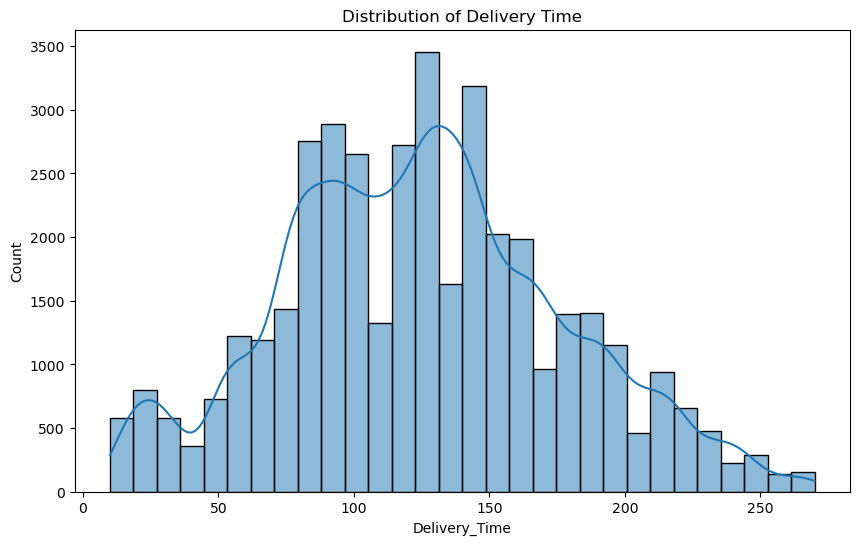

In [29]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title('Distribution of Delivery Time')
plt.show()

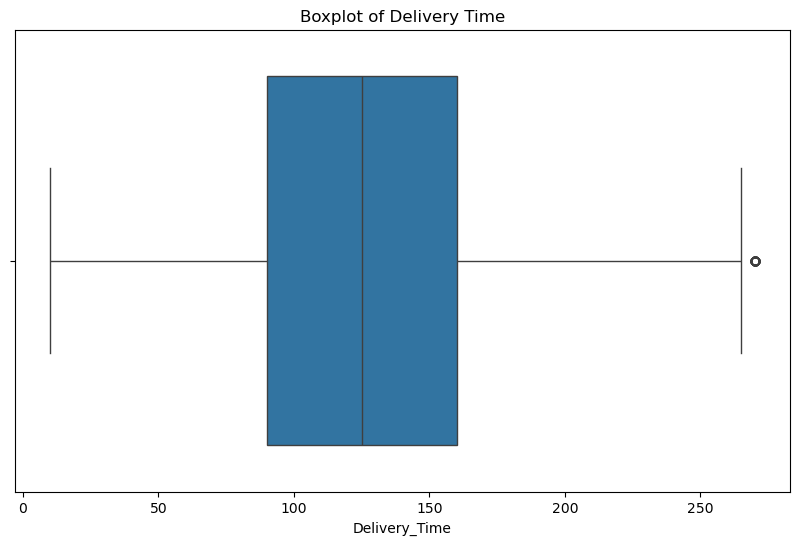

In [30]:
# Boxplot to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Delivery_Time'])
plt.title('Boxplot of Delivery Time')
plt.show()

In [31]:
#EXPLORATORY DATA ANALYSIS

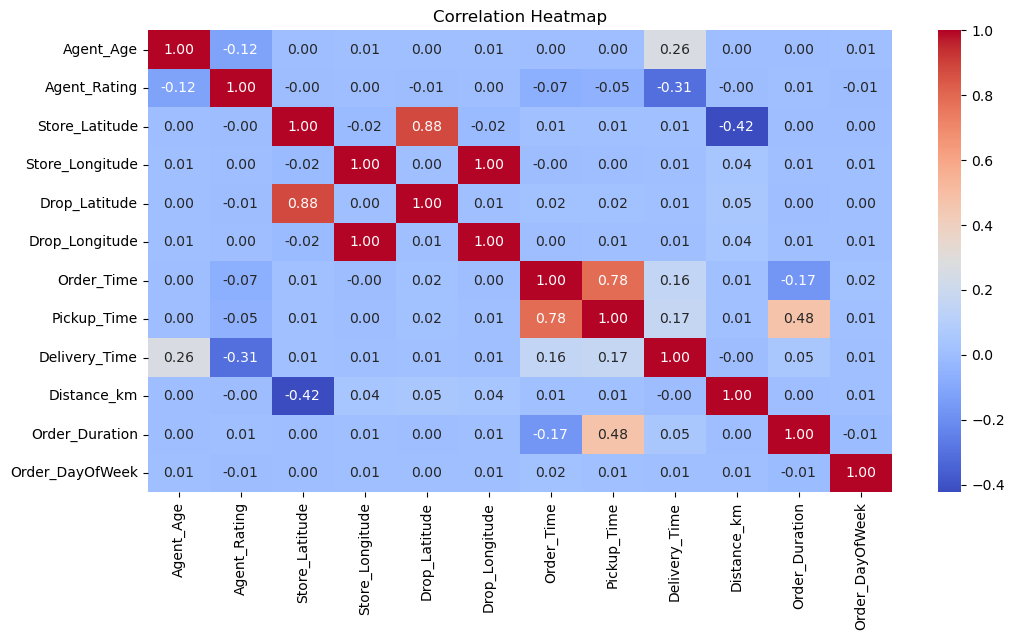

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [33]:
# Obersvations:
# high pos corr delivery time and  higher age, older driver delivery time longer
# negative correlation betwen agent rating and delivery time, lower del time meand higher rating
# slight negative corr: younger the drive the hight the rating
#These results could be something else to look into

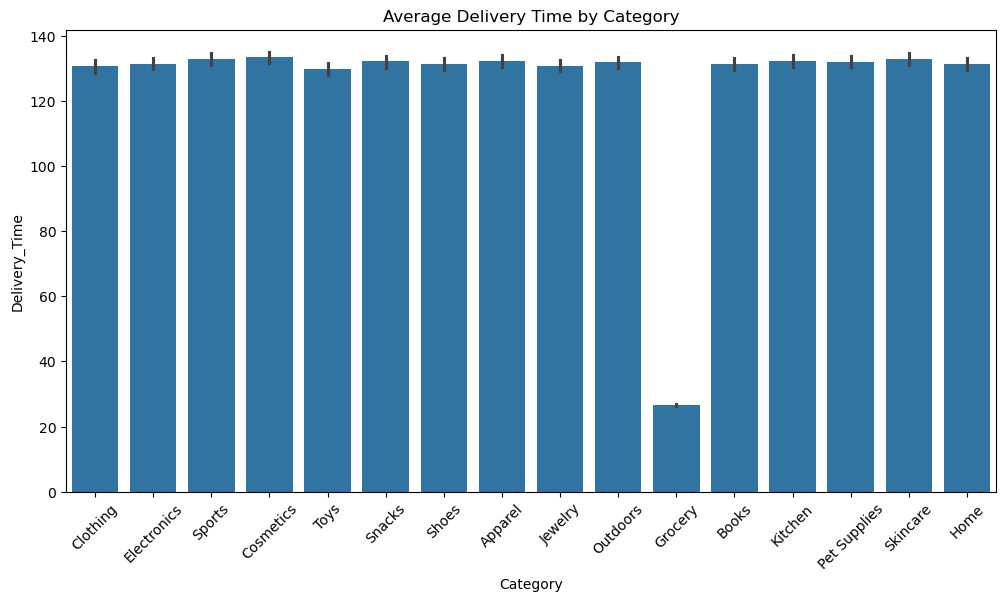

In [34]:
# Delivery Time by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Delivery_Time', data=df)
plt.xticks(rotation=45)
plt.title('Average Delivery Time by Category')
plt.show()

#delivery time is consistently average across all products, except for groceries, which had a significantly lower delivery time.

In [35]:
avg_delivery_time = df.groupby('Category')['Delivery_Time'].mean().reset_index()
print(avg_delivery_time)

        Category  Delivery_Time
0        Apparel     132.296862
1          Books     131.222222
2       Clothing     130.570539
3      Cosmetics     133.335388
4    Electronics     131.362760
5        Grocery      26.554088
6           Home     131.395207
7        Jewelry     130.804935
8        Kitchen     132.273663
9       Outdoors     131.818363
10  Pet Supplies     132.025756
11         Shoes     131.260834
12      Skincare     132.727453
13        Snacks     132.042366
14        Sports     132.774614
15          Toys     129.734357


In [36]:
filtered_grocery = df[df['Category'] != 'Grocery']

In [37]:
avg_delivery_time_non_groc = filtered_grocery.groupby('Category')['Delivery_Time'].mean().reset_index()

In [38]:
print(avg_delivery_time_non_groc['Delivery_Time'].mean())

131.70968798348173


In [39]:
display(df.head())

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance_km,Order_Duration,Order_DayOfWeek,Time_of_Day
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11.0,11,Sunny,High,motorcycle,Urban,120,Clothing,3.025153,0.0,5,Morning
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19.0,19,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183558,0.0,4,Evening
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,8.0,8,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552760,0.0,5,Morning
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18.0,18,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790412,0.0,1,Afternoon
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13.0,13,Cloudy,High,scooter,Metropolitian,150,Toys,6.210147,0.0,5,Afternoon


<Axes: xlabel='Area', ylabel='Delivery_Time'>

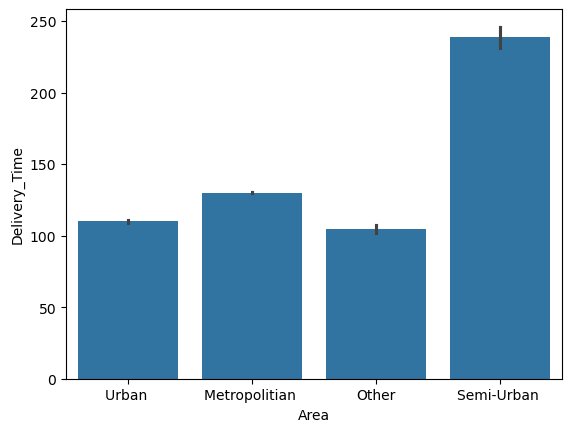

In [40]:
sns.barplot(df,y=df["Delivery_Time"],x=df["Area"])

<Axes: xlabel='Area', ylabel='Delivery_Time'>

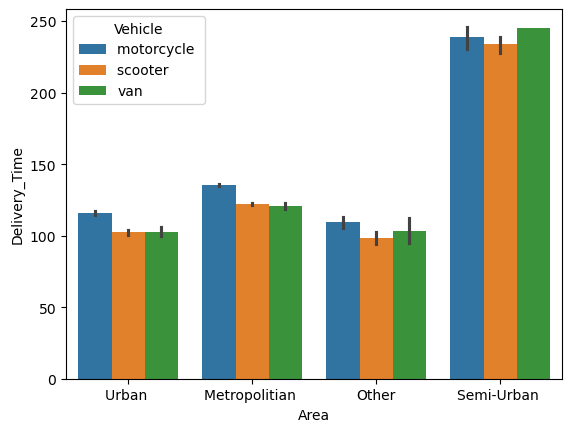

In [41]:
# What impact does area and vehicle type have on delivery time

sns.barplot(df,y=df["Delivery_Time"],x=df["Area"],hue=df["Vehicle"])

In [42]:
avg_delivery_time = df.groupby('Area')['Delivery_Time'].mean().reset_index()
print(avg_delivery_time)

             Area  Delivery_Time
0  Metropolitian      130.041055
1           Other     104.568533
2     Semi-Urban      238.717391
3          Urban      109.894827


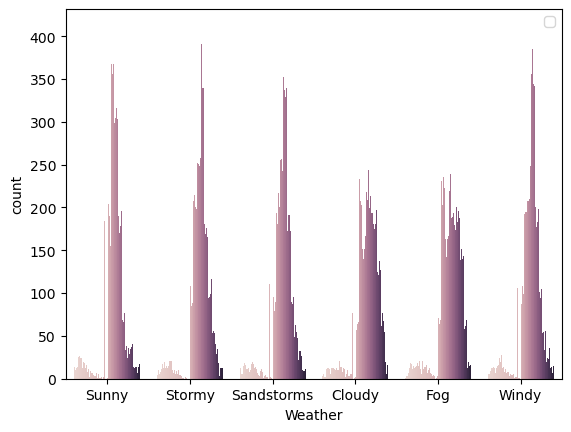

In [43]:
# exploring impact of weather

sns.countplot(x=df["Weather"],hue=df["Delivery_Time"])
plt.legend([], [], frameon=True)  

#one would think, good weather less traffic, fog cloud have lower traffic density

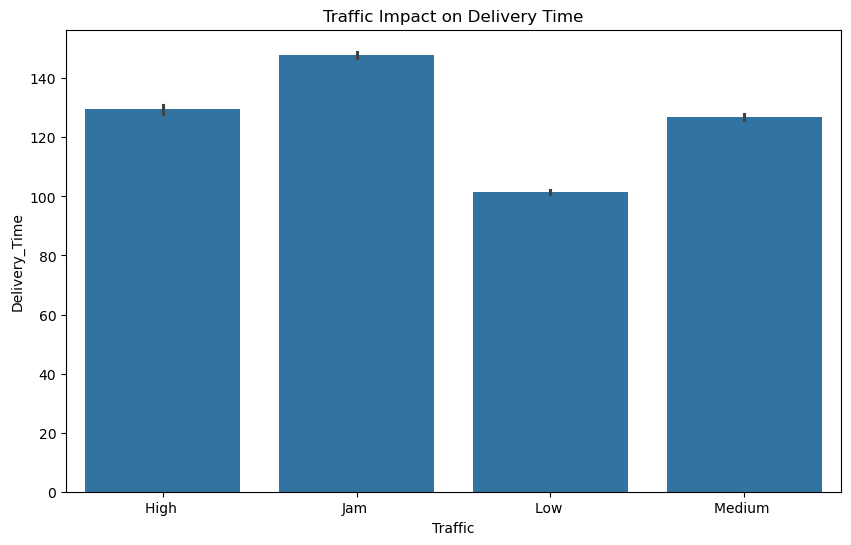

In [44]:
# Traffic Impact on Delivery Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Traffic', y='Delivery_Time', data=df)
plt.title('Traffic Impact on Delivery Time')
plt.show()

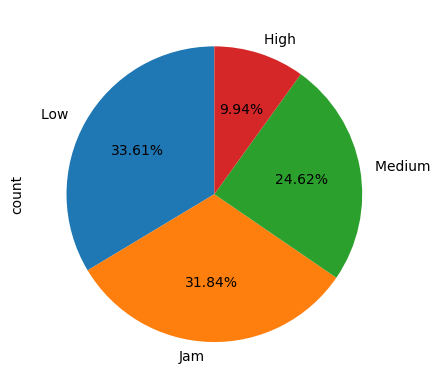

In [45]:
df["Traffic"].value_counts().plot(kind='pie',autopct='%.2f%%',startangle=90)
plt.show()

In [46]:
# END EXPLORATORY

In [47]:
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, columns=['Weather', 'Traffic', 'Vehicle', 'Area', 'Category', 'Time_of_Day'], drop_first=True)

In [48]:
# Define target and features
y = df['Delivery_Time']
X = df.drop(columns=['Order_ID', 'Delivery_Time'])

In [49]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Model Training
# Drop datetime columns 
X_train = X_train.select_dtypes(exclude=['datetime64'])
X_test = X_test.select_dtypes(exclude=['datetime64'])


In [51]:
# remove NaN
X_train = X_train.dropna()
X_test = X_test.dropna()

In [52]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [53]:
# Ensure that y_train only contains rows corresponding to X_train
y_train = y_train.iloc[:X_train.shape[0]]


In [54]:
print(f"X_train_poly shape: {X_train_poly.shape}")
print(f"y_train shape: {y_train.shape}")


X_train_poly shape: (31806, 946)
y_train shape: (31806,)


In [55]:
lin_model = LinearRegression()
lin_model.fit(X_train_poly, y_train)

y_pred_lin = lin_model.predict(X_test_poly)

In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
rf_best_model = grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)

In [ ]:
# model didn't surn first time, confirm they are the same number of rowws
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

In [ ]:
print(f"X_test shape: {X_test.shape}")  
print(f"X_test_poly shape: {X_test_poly.shape}")  
print(f"y_test shape: {y_test.shape}")  
print(f"y_pred_lin shape: {y_pred_lin.shape}")  


In [ ]:
# fix the test data set
y_test = y_test.iloc[:X_test_poly.shape[0]]

In [ ]:
print(f"X_test shape: {X_test.shape}")  
print(f"X_test_poly shape: {X_test_poly.shape}")  
print(f"y_test shape: {y_test.shape}")  
print(f"y_pred_lin shape: {y_pred_lin.shape}")  


In [ ]:
# Model Evaluation
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)


In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print("Linear Regression:")
print(f"Mean Absolute Error: {mae_lin}")
print(f"Mean Squared Error: {mse_lin}")
print(f"R-squared Score: {r2_lin}")

In [ ]:
print("Random Forest:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared Score: {r2_rf}")

In [ ]:
# Visualizing Model Performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time (Random Forest)')
plt.show()

In [ ]:

# Insights
print("Insights:")
print("- Traffic conditions have a significant impact on delivery time.")
print("- Weather conditions also contribute but to a lesser extent.")
print("- Areas and distance strongly influence delivery efficiency.")
